In [2]:
pip install geopandas

                                              0.0/1.1 MB ? eta -:--:--
     ------------                             0.3/1.1 MB 10.2 MB/s eta 0:00:01
     -----------------------                  0.7/1.1 MB 8.2 MB/s eta 0:00:01
     -------------------------------------    1.0/1.1 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 7.7 MB/s eta 0:00:00
                                              0.0/22.7 MB ? eta -:--:--
                                              0.5/22.7 MB 15.9 MB/s eta 0:00:02
     -                                        0.9/22.7 MB 11.4 MB/s eta 0:00:02
     --                                       1.3/22.7 MB 11.6 MB/s eta 0:00:02
     --                                       1.7/22.7 MB 10.8 MB/s eta 0:00:02
     ---                                      2.1/22.7 MB 10.2 MB/s eta 0:00:03
     ----                                     2.4/22.7 MB 10.3 MB/s eta 0:00:02
     ----                                     2.8/22.7 MB 9.8 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown-mermaid-to-images 0.3.0.post1 requires click<8.0,>=7.0, but you have click 8.1.6 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\bbsur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
pip install geodatasets

                                              0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\bbsur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
pip install geoplot

                                              0.0/11.2 MB ? eta -:--:--
                                              0.2/11.2 MB 7.0 MB/s eta 0:00:02
     --                                       0.7/11.2 MB 8.2 MB/s eta 0:00:02
     ---                                      1.1/11.2 MB 8.4 MB/s eta 0:00:02
     ----                                     1.4/11.2 MB 8.8 MB/s eta 0:00:02
     ------                                   1.8/11.2 MB 8.5 MB/s eta 0:00:02
     -------                                  2.2/11.2 MB 9.2 MB/s eta 0:00:01
     ---------                                2.7/11.2 MB 9.4 MB/s eta 0:00:01
     ----------                               3.0/11.2 MB 9.2 MB/s eta 0:00:01
     -----------                              3.1/11.2 MB 9.1 MB/s eta 0:00:01
     -----------                              3.1/11.2 MB 9.1 MB/s eta 0:00:01
     -----------                              3.1/11.2 MB 9.1 MB/s eta 0:00:01
     ------------                             3.6/11.2 MB 7


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\bbsur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [6]:
import geopandas
import geodatasets
import geoplot

world = geopandas.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
boroughs = geopandas.read_file(geoplot.datasets.get_path("nyc_boroughs"))
collisions = geopandas.read_file(geoplot.datasets.get_path("nyc_injurious_collisions"))


AttributeError: 'MultiPolygon' object has no attribute 'exterior'

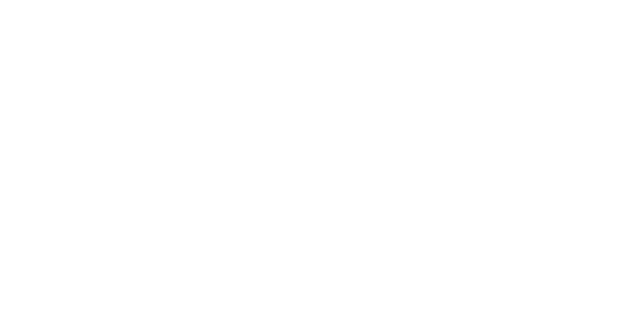

In [7]:
geoplot.polyplot(world, figsize=(8, 4))

C:\Users\bbsur\AppData\Local\Programs\Python\Python310\lib\site-packages\geoplot\geoplot.py:703: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  warnings.warn(


AttributeError: 'GeoAxes' object has no attribute 'outline_patch'

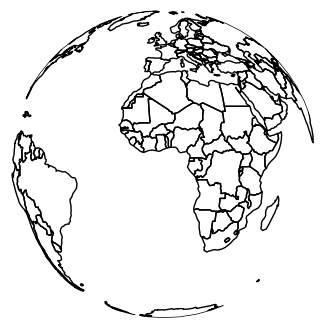

In [8]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(world, projection=geoplot.crs.Orthographic(), figsize=(8, 4))
ax.outline_patch.set_visible(True)


In [9]:
import mapclassify

gpd_per_person = world["gdp_md_est"] / world["pop_est"]
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme, cmap="Greens", figsize=(8, 4)
)

KeyError: 'gdp_md_est'

In [10]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale="pop_est", limits=(0.2, 1), edgecolor="None", figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)

UndefinedVariableError: name 'continent' is not defined

C:\Users\bbsur\AppData\Local\Programs\Python\Python310\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<GeoAxes: >

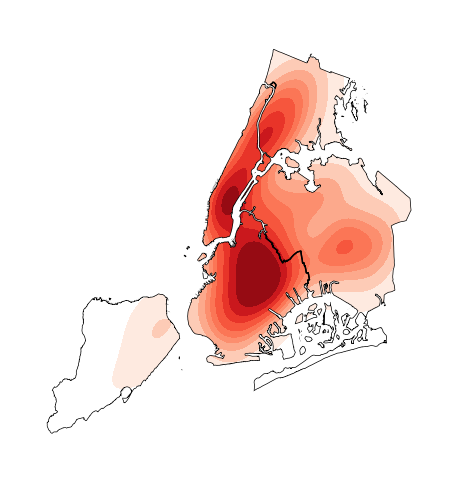

In [11]:
ax = geoplot.kdeplot(
    collisions.head(1000),
    clip=boroughs.geometry,
    shade=True,
    cmap="Reds",
    projection=geoplot.crs.AlbersEqualArea(),
)
geoplot.polyplot(boroughs, ax=ax, zorder=1)